In [215]:
#importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pymc3 as pm
import theano as T
from scipy.stats import norm, skewnorm, halfcauchy
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
import arviz as az

In [216]:
df=pd.read_csv("Heart.csv",";")

In [217]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [219]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

- our dataset do not have a missing values

In [220]:
# Checking for duplicates
duplicate = df[df.duplicated()]
duplicate

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


- our dataset have one duplicate


In [221]:
# Removing duplicate data 
df.drop_duplicates(keep='first', inplace=True)

In [222]:
len(df)

302

In [223]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


our dataset is now having 302 records of patient since we deleted a duplicated data

# Conversion for Visualizing Data

In [224]:
#for target
conversion_dict = {1 : 'isHeartPatient', 0 : 'isNotHeartPatient'}
df['target'] = df['target'].replace(conversion_dict)
#for sex
conversion_dict = {1 : 'Male', 0 : 'Female'}
df['sex'] = df['sex'].replace(conversion_dict)
#for cp
conversion_dict = {0 : 'Typical', 1 : 'Atypical', 2 : 'Non-anginal', 3 : 'Asymptomatic'}
df['cp'] = df['cp'].replace(conversion_dict)
#for fbs
conversion_dict = {1 : 'fbs > 120 mg/dl', 0 : 'fbs < 120 mg/dl'}
df['fbs'] = df['fbs'].replace(conversion_dict)
#for exang
conversion_dict = {1 : 'induced angina', 0 : 'not induced angina'}
df['exang'] = df['exang'].replace(conversion_dict)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,Asymptomatic,145,233,fbs > 120 mg/dl,0,150,not induced angina,2.3,0,0,1,isHeartPatient
1,37,Male,Non-anginal,130,250,fbs < 120 mg/dl,1,187,not induced angina,3.5,0,0,2,isHeartPatient
2,41,Female,Atypical,130,204,fbs < 120 mg/dl,0,172,not induced angina,1.4,2,0,2,isHeartPatient
3,56,Male,Atypical,120,236,fbs < 120 mg/dl,1,178,not induced angina,0.8,2,0,2,isHeartPatient
4,57,Female,Typical,120,354,fbs < 120 mg/dl,1,163,induced angina,0.6,2,0,2,isHeartPatient


# DATA VISUALIZATION

# 1.Sex (1 : Male , 0 : Female) vs Heart Disease Patients

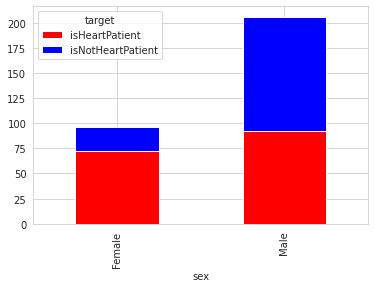

In [225]:
df_plot = df.groupby(['target', 'sex']).size().reset_index().pivot(columns='target', index='sex', values=0)
df_plot.plot(kind='bar', stacked=True, color=['red','blue'])

Observations

-from the graph we can see the number of female that are having heart disease and not having heart disease.

-from the graph we can see the number of male that are having heart disease and not having heart disease


# 2. Chest Pain Type vs Heart Disease Patients

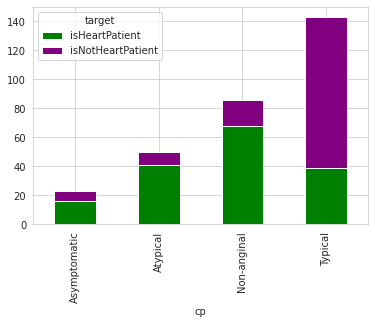

In [226]:
df_plot = df.groupby(['target', 'cp']).size().reset_index().pivot(columns='target', index='cp', values=0)
df_plot.plot(kind='bar', stacked=True, color=['green','purple'])

Obsevations

-from the graph we can see that patient that are having a cp(typical) are most that are the one that are having heart disease.

-whereas patient that are having a cp(asymtomatics are least infected with heart disease

#  3. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) vs Heart Disease Patients

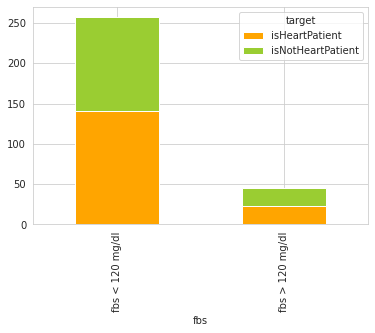

In [227]:
df_plot = df.groupby(['target', 'fbs']).size().reset_index().pivot(columns='target', index='fbs', values=0)
df_plot.plot(kind='bar', stacked=True, color=['orange', 'yellowgreen'])

Observations

-from the graph we can see that patients that are having a fbs that is less than 120mg/dl are the most that are having heart disease

-from the graph we can see that patients that are having a fbs that is greater than 120mg/dl are those  least patient having heart disease

# 4. exang: exercise induced angina (1 = yes; 0 = no) vs Heart Disease Patients

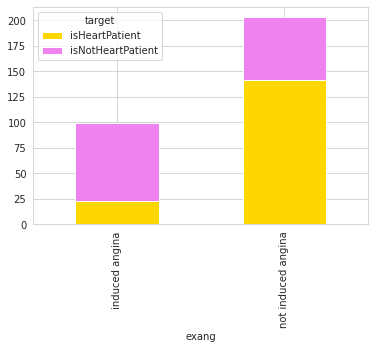

In [228]:
df_plot = df.groupby(['target', 'exang']).size().reset_index().pivot(columns='target', index='exang', values=0)
df_plot.plot(kind='bar', stacked=True, color=['gold', 'violet'])

Observations

-from the gragh we can see that patients that are exang(not induced angina sysmptom) are the most that are having heart disease

-from the gragh we can see that patients that are exang(induced angina sysmptom) are least patient that are having heart disease

# . Number of people who have heart disease according to age

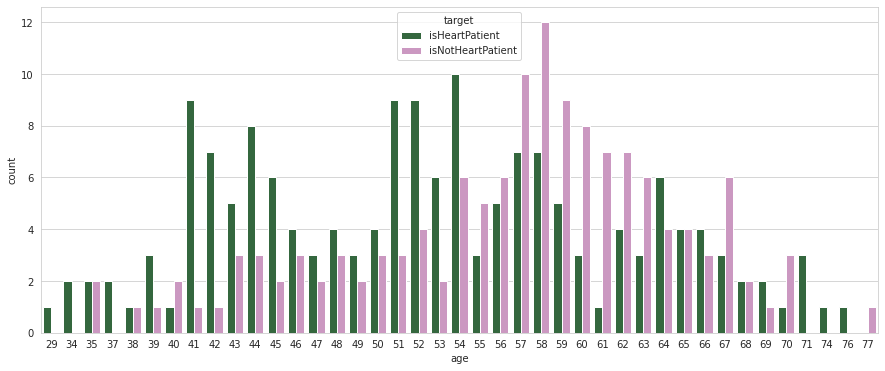

In [229]:

plt.figure(figsize=(15,6))
sns.countplot(x='age',data = df, hue = 'target',palette='cubehelix')

# Observations

-from the graph we can see that most patients that are having heart disease are 54 years old

-whereas patient that are least having heart disease are 38,39,41 and 42

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Age')

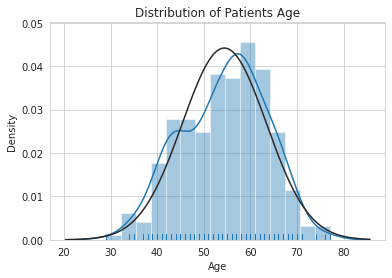

In [230]:

from scipy.stats import norm, skewnorm, halfcauchy

# Fit a normal distribution to the data to observe if it is normally distributed 
sns.distplot(df.age, rug=True, bins=15, fit=norm)
plt.title('Distribution of Patients Age')
plt.xlabel('Age')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Cholesterol (mg/dl)')

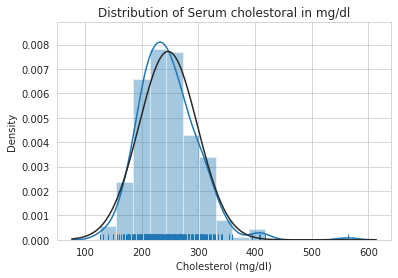

In [231]:
sns.distplot(df.chol, rug=True, bins=15, fit=norm)
plt.title('Distribution of Serum cholestoral in mg/dl')
plt.xlabel('Cholesterol (mg/dl)')

# Plotting the distribution of  trestbps: resting blood pressure (in mm Hg on admission to the hospital)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


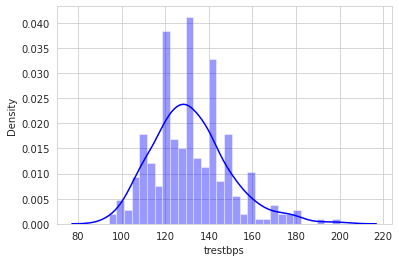

In [232]:
sns.distplot(df['trestbps'],kde=True,bins=30,color='blue')

#numerical features distributed according to the target feature

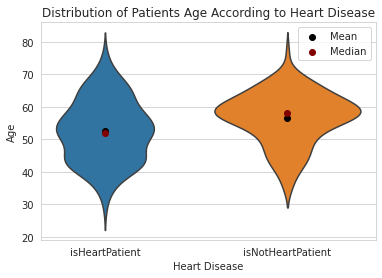

In [233]:
sns.set_style('whitegrid') # grid to easily make sense of numbers in plots
cust_col = ["#1f77b4", "#ff7f0e"] # own custom color scheme 
sns.set_palette(cust_col) # set color scheme

age_mean = df.groupby('target')['age'].mean() # calculate group mean
age_median = df.groupby('target')['age'].median() # calculate group median 
age_order = df.groupby('target')['age'].mean().iloc[::1].index # calculate mean for grouping according to mean
sns.violinplot(x='target', y='age', data=df, inner=None, order=age_order);
plt.title('Distribution of Patients Age According to Heart Disease');
plt.xlabel('Heart Disease');
plt.ylabel('Age');
plt.scatter(x=range(len(age_mean)),y=age_mean,c="k", label = "Mean");
plt.scatter(x=range(len(age_median)),y=age_median, c="maroon", label = "Median");
plt.legend();

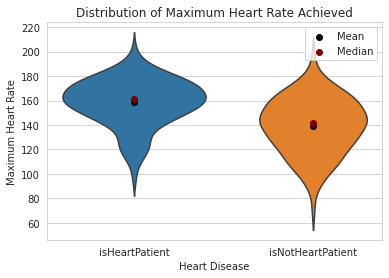

In [234]:
thalach_mean = df.groupby('target')['thalach'].mean() 
thalach_median = df.groupby('target')['thalach'].median() 
thalach_order = df.groupby('target')['thalach'].mean().iloc[::1].index 
sns.violinplot(x='target', y='thalach', data=df, inner=None, order=thalach_order);
plt.title('Distribution of Maximum Heart Rate Achieved');
plt.xlabel('Heart Disease');
plt.ylabel('Maximum Heart Rate');
plt.scatter(x=range(len(thalach_mean)),y=thalach_mean,c="k", label = "Mean");
plt.scatter(x=range(len(thalach_median)),y=thalach_median, c="maroon", label = "Median");
plt.legend();

In [235]:

#for target
conversion_dict = {'isHeartPatient' : 1, 'isNotHeartPatient' : 0}
df['target'] = df['target'].replace(conversion_dict)
#for sex
conversion_dict = {'Male' : 1,'Female' : 0}
df['sex'] = df['sex'].replace(conversion_dict)
#for cp
conversion_dict = {'Typical' : 0,'Atypical' : 1,'Non-anginal' : 2,'Asymptomatic' : 3}
df['cp'] = df['cp'].replace(conversion_dict)
#for fbs
conversion_dict = {'fbs > 120 mg/dl' : 1, 'fbs < 120 mg/dl' : 0}
df['fbs'] = df['fbs'].replace(conversion_dict)
#for exang
conversion_dict = {'induced angina' : 1,'not induced angina' : 0}
df['exang'] = df['exang'].replace(conversion_dict)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Splitting the dataset into train and test 

In [236]:
x = df.drop('target',axis=1)
y = df['target']

In [237]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [238]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [239]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35, random_state=42)

# feature selection
-feature selection using feature importance

In [240]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

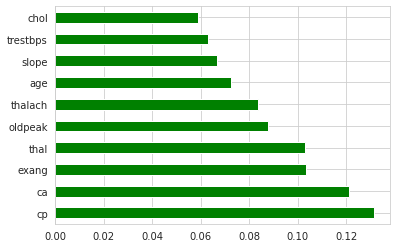

In [241]:
feat_importance = pd.Series(model.feature_importances_,index=x.columns)
feat_importance.nlargest(10).plot(kind="barh",color="green")
plt.show()

Observstions

-from the above graph we can see attribute that has most effect on out target value(cp,ca,exang,thal,oldpeak and thalach)

-so for building our model we will use those attribute that has most effect on our target 

In [242]:
heart_features = ['cp', 'ca', 'exang', 'thal', 'oldpeak', 'thalach', 'target']
df_1 = df.copy()
df_1 = df_1[heart_features]

In [243]:
df_1.head()

,cp,ca,exang,thal,oldpeak,thalach,target
0,3,0,0,1,2.3,150,1
1,2,0,0,2,3.5,187,1
2,1,0,0,2,1.4,172,1
3,1,0,0,2,0.8,178,1
4,0,0,1,2,0.6,163,1


-our new dataset with the most effective attributes to our target 

# preprocessing by scaling features

In [244]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics

#  ML MODELS COMPARISON

-in this part im going to compare probablistic model with other three machine learning models namely:

-logistic  regression

-Gaussian Naive Bayesian

-K Nearest Neighors Algorithm

# 1. logistic regression

In [245]:
from sklearn.linear_model import LogisticRegression

In [246]:
log_Reg = LogisticRegression()

In [247]:
log_Reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [248]:
begin = time.time()
y_pred = log_Reg.predict(x_test)
end = time.time()
lrExecTime = end - begin
print('Execution Time taken by Logistic Regression : ',lrExecTime)

Execution Time taken by Logistic Regression :  0.0007231235504150391


In [249]:
y_pred

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1])

# Printing Classification Matrix

In [250]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79        45
           1       0.85      0.84      0.84        61

    accuracy                           0.82       106
   macro avg       0.82      0.82      0.82       106
weighted avg       0.82      0.82      0.82       106



# Printing Confusion Matrix

In [251]:
print(confusion_matrix(y_test, y_pred))

[[36  9]
 [10 51]]


# Accuracy Score

In [252]:
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
lrAccuracy = round(accuracy_score(y_test,y_pred),5)*100
print('Using Logistic Regression we get an accuracy score of: ',
      lrAccuracy,'%')

Accuracy:  0.8207547169811321
Accuracy Score:  0.8207547169811321
Using Logistic Regression we get an accuracy score of:  82.075 %


# 2. Gaussian Naive Bayesian

In [253]:
from sklearn.naive_bayes import GaussianNB

In [254]:
gnb = GaussianNB()

In [255]:
gnb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [256]:
begin = time.time()
y_pred = gnb.predict(x_test)
end = time.time()
gnbExecTime = end - begin
print('Execution Time taken by GNB : ',gnbExecTime)

Execution Time taken by GNB :  0.001155853271484375


In [257]:
y_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1])

# Confusion Matrix

In [258]:
print(confusion_matrix(y_test, y_pred))

[[39  6]
 [11 50]]


# Classification Matrix

In [259]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82        45
           1       0.89      0.82      0.85        61

    accuracy                           0.84       106
   macro avg       0.84      0.84      0.84       106
weighted avg       0.84      0.84      0.84       106



# Accuracy Score

In [260]:
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
gnbAccuracy = round(accuracy_score(y_test,y_pred),5)*100
print('Using Gaussian Naive Bayesian we get an accuracy score of: ',
      gnbAccuracy,'%')

Accuracy:  0.839622641509434
Accuracy Score:  0.839622641509434
Using Gaussian Naive Bayesian we get an accuracy score of:  83.962 %


# Applying K Nearest Neighors Algorithm

In [261]:
from sklearn.neighbors import KNeighborsClassifier

In [262]:
classifier = KNeighborsClassifier(n_neighbors=7)

In [263]:
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

# Making predictions

In [264]:

begin = time.time()
y_pred = classifier.predict(x_test)
end = time.time()
knnExecTime = end - begin
print('Execution Time taken by KNN : ',knnExecTime)

Execution Time taken by KNN :  0.027278423309326172


In [265]:
y_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1])

# Confusion Matrix

In [266]:
print(confusion_matrix(y_test, y_pred))

[[36  9]
 [ 9 52]]


# Classification Matrix

In [267]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        45
           1       0.85      0.85      0.85        61

    accuracy                           0.83       106
   macro avg       0.83      0.83      0.83       106
weighted avg       0.83      0.83      0.83       106



# Accuracy Score

In [268]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
knnAccuracy = round(accuracy_score(y_test,y_pred),5)*100
print('Using k-NN we get an accuracy score of: ',
      knnAccuracy,'%')

Accuracy Score:  0.8301886792452831
Using k-NN we get an accuracy score of:  83.019 %


# Execution Time : Logistic Regression vs Gaussian Naive Bayesian vs KNN Algorith

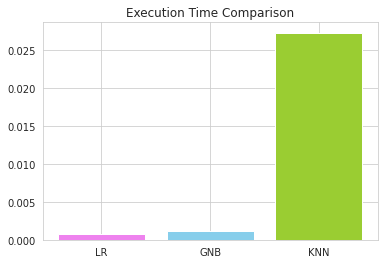

In [269]:
labels = 'LR','GNB','KNN'
values = [lrExecTime,gnbExecTime,knnExecTime]
plt.bar(labels,values,color=['violet','skyblue','yellowgreen'])
plt.title('Execution Time Comparison')
plt.show()

# Accuracy : Logistic Regression vs Gaussian Naive Bayesian vs KNN Algorithm

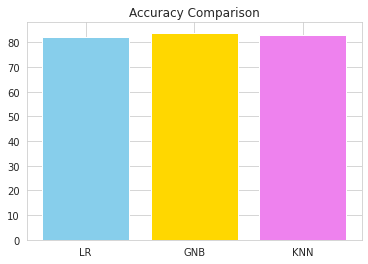

In [270]:
labels = 'LR','GNB','KNN'
values = [lrAccuracy,gnbAccuracy,knnAccuracy]
plt.bar(labels,values,color=['skyblue','gold','violet'])
plt.title('Accuracy Comparison')
plt.show()

observations

from the above graph we can see that the k nearest outperforms the rest of the model

# building probablistic model

In [271]:
# Predictor Features
X_df = df_1.loc[:, df_1.columns != 'target']

In [ ]:
with pm.Model() as heartDisease_model:
    # Priors
    Intercept = pm.Normal('Intercept', 0, 2)
    Theta = pm.Normal('Theta', 0, 5, shape=X_df.shape[1])
    
    mu = Intercept + pm.math.matrix_dot(X_df, Theta)
    y_lik = pm.Deterministic('y', pm.math.sigmoid(mu))

    # Likelihood
    y_obs = pm.Bernoulli(name='y-like', p=y_lik, observed=df_1.target)
    trace_1 = pm.sample(draws=2000, tune=1000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  # This is added back by InteractiveShellApp.init_path()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [Theta, Intercept]


In [ ]:
az.plot_trace(trace_1);

# Posterior Check

In [ ]:
with heartDisease_model:
    p_c = pm.sample_posterior_predictive(trace_1)

In [ ]:

y_score = np.mean(p_c['y-like'], axis=0)

In [ ]:
y = df_1.target

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:

y_pred = np.array([1 if x>0.5 else 0 for x in y_score])

In [ ]:
import pickle as pickl
# save model to disk
with open('heartDisease.pkl', 'wb') as buff:
    pickl.dump({'model': heartDisease_model, 'trace': trace_1}, buff)

In [ ]:
# load the model from disk
with open('heartDisease.pkl', 'rb') as buff:
    PMLmodel_data = pickl.load(buff)  

PML_loadModel1, PML1_trace = PMLmodel_data['model'], PMLmodel_data['trace']

In [ ]:
az.plot_ppc(az.from_pymc3(posterior_predictive=p_c, model=heartDisease_model));

# Classification matrix of Probabilistic Model 

In [ ]:

print(classification_report(y, y_pred))

In [ ]:
print('Accuracy Score: ',accuracy_score(y, y_pred))
Probabilistic_Model = round(accuracy_score(y, y_pred),5)*100
print('Using Probabilistic_Model we get an accuracy score of: ',
      Probabilistic_Model,'%')

In [ ]:
labels = 'LR','GNB','KNN','PB'
values = [lrAccuracy,gnbAccuracy,knnAccuracy,Probabilistic_Model]
plt.bar(labels,values,color=['skyblue','gold','violet','blue'])
plt.title('Accuracy Comparison')
plt.show()

Discussion 

-we can observe that probablistic model  outperforms  all model with the accuracy of 84.437 % whereas logistic regression has an accuracy of 82.075 %, Gaussian Naive Bayesian has an accuracy of 83.986 %  and k nearest has an accuracy of 83.019 %

